<a href="https://colab.research.google.com/github/soujanya-vattikolla/ML-Basics-Definitions/blob/main/Outlier_removal_z_score%2Cstd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercise:

You are given bhp.csv which contains property prices in the city of banglore, India. You need to examine price_per_sqft column and do following,

(1) Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles

(2) After removing outliers in step 1, you get a new dataframe.

(3) On step(2) dataframe, use 4 standard deviation to remove outliers

(4) Plot histogram for new dataframe that is generated after step (3). Also plot bell curve on same histogram

(5) On step(2) dataframe, use zscore of 4 to remove outliers. This is quite similar to step (3) and you will get exact same result

In [1]:
# import required libraries

import pandas as pd
import matplotlib 
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)

In [2]:
property_df = pd.read_csv('bhp.csv')
property_df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [3]:
property_df.shape

(13200, 7)

They are 13200 rows and 7 columns

In [4]:
property_df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [5]:
property_df.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

Above, you can see max is 12000000, which is too much price for price per sqft. 

Plot histogram to see how is the data distribution

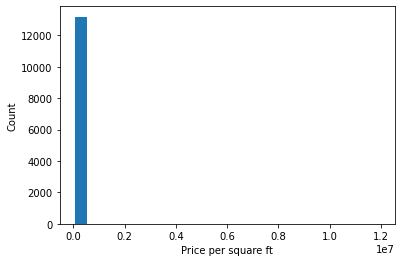

In [6]:
plt.hist(property_df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

Above chart confirms our understanding that this dataset has some bad outliers. 

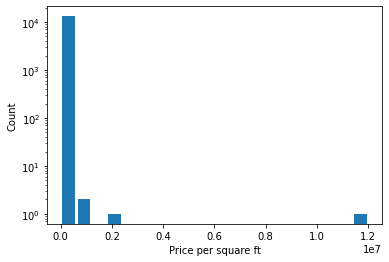

In [7]:
# Using log scale can make visualization little better
plt.hist(property_df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

In [8]:
# Detect outliers using percentile

min_threshold,max_threshold = property_df.price_per_sqft.quantile([0.001, 0.999])

min_threshold,max_threshold

(1366.184, 50959.36200000098)

In [9]:
property_df[property_df.price_per_sqft < min_threshold]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
665,Yelahanka,3 BHK,35000.0,3.0,130.0,3,371
798,other,4 Bedroom,10961.0,4.0,80.0,4,729
1867,other,3 Bedroom,52272.0,2.0,140.0,3,267
2392,other,4 Bedroom,2000.0,3.0,25.0,4,1250
3934,other,1 BHK,1500.0,1.0,19.5,1,1300
5343,other,9 BHK,42000.0,8.0,175.0,9,416
5417,Ulsoor,4 BHK,36000.0,4.0,450.0,4,1250
5597,JP Nagar,2 BHK,1100.0,1.0,15.0,2,1363
7166,Yelahanka,1 Bedroom,26136.0,1.0,150.0,1,573
7862,JP Nagar,3 BHK,20000.0,3.0,175.0,3,875


In [10]:
property_df[property_df.price_per_sqft > max_threshold]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
1005,other,1 BHK,15.0,1.0,30.0,1,200000
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
5911,Mysore Road,1 Bedroom,45.0,1.0,23.0,1,51111
6356,Bommenahalli,4 Bedroom,2940.0,3.0,2250.0,4,76530
7012,other,1 BHK,650.0,1.0,500.0,1,76923
7575,other,1 BHK,425.0,1.0,750.0,1,176470
7799,other,4 BHK,2000.0,3.0,1063.0,4,53150


In [11]:
# Remove outliers using percentile

property_df_new = property_df[(property_df.price_per_sqft < max_threshold) & (property_df.price_per_sqft > min_threshold)]
property_df_new

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [12]:
property_df.shape[0] - property_df_new.shape[0]

28

28 outliers are removed.

#### Outlier detection and removal using 4 standard deviation

One of the ways we can remove outliers is remove any data points that are beyond 4 standard deviation from mean. Which means we can come up with following upper and lower bounds

In [13]:
upper_limit = property_df_new.price_per_sqft.mean() + 4*property_df_new.price_per_sqft.std()
upper_limit

23227.73653589429

In [14]:
lower_limit = property_df_new.price_per_sqft.mean() - 4*property_df_new.price_per_sqft.std()
lower_limit

-9900.429065502549

Here are the outliers that are beyond 4 std dev from mean

In [15]:
property_df_new[(property_df_new.price_per_sqft > upper_limit) | (property_df_new.price_per_sqft < lower_limit)].sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
11696,other,4 Bedroom,2360.0,4.0,601.0,4,25466
3665,Koramangala,4 Bedroom,2400.0,6.0,600.0,4,25000
9290,other,4 Bedroom,2400.0,3.0,750.0,4,31250
5909,other,5 Bedroom,1240.0,5.0,300.0,5,24193
12678,Chikkalasandra,5 Bedroom,1000.0,4.0,300.0,5,30000
13094,other,4 Bedroom,1200.0,5.0,325.0,4,27083
3401,Indira Nagar,6 Bedroom,2480.0,4.0,750.0,6,30241
8454,other,3 Bedroom,7800.0,3.0,2000.0,3,25641
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,27083
3144,other,5 BHK,8321.0,5.0,2700.0,5,32448


Now remove these outliers and generate new dataframe

In [16]:
property_no_outlier = property_df_new[(property_df_new.price_per_sqft < upper_limit) & (property_df_new.price_per_sqft > lower_limit)]
property_no_outlier.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [17]:
property_df_new.shape[0] - property_no_outlier.shape[0]

125

They are 125 outliers and are removed from the dataset.

Plotting a histogram

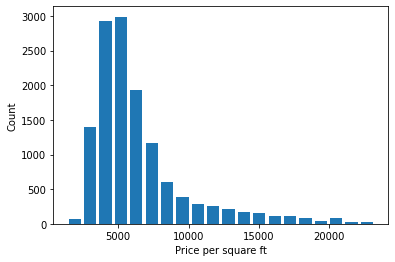

In [18]:
plt.hist(property_no_outlier.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

Plot bell curve along with histogram for our dataset

In [19]:
from scipy.stats import norm
import numpy as np

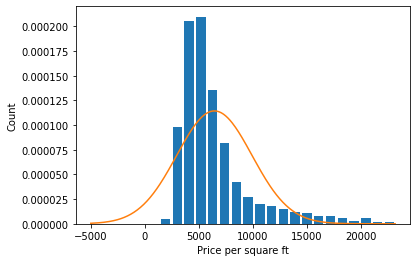

In [20]:
plt.hist(property_no_outlier.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.xlabel('Price per square ft')
plt.ylabel('Count')

rng = np.arange(-5000, property_no_outlier.price_per_sqft.max(), 100)
plt.plot(rng, norm.pdf(rng, property_no_outlier.price_per_sqft.mean(),property_no_outlier.price_per_sqft.std()))


In [21]:
property_no_outlier.price_per_sqft.mean()

6449.328044761248

In [22]:
property_no_outlier.price_per_sqft.std()

3487.6700047355853

Here the mean is 6449 and std is 3487.

Outlier detection and removal using Z Score

Z score indicates how many standard deviation away a data point is.

In [23]:
property_df_new['zscore'] = (property_df_new['price_per_sqft'] - property_df_new['price_per_sqft'].mean())/property_df_new['price_per_sqft'].std()
property_df_new.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864


Above for first record with price_per_sqft 3699, z score is -0.71. This means 3699 is -0.71 standard deviation away from mean.

In [24]:
# Get data points that has z score higher than 4 or lower than -4.

property_df_new[property_df_new['zscore']>4]


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274,7.150495
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333,6.440283
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
733,Cunningham Road,4 BHK,5270.0,4.0,1250.0,4,23719,4.118633
760,other,9 Bedroom,600.0,9.0,190.0,9,31666,6.037725
...,...,...,...,...,...,...,...,...
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000,6.842841
13094,other,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
13127,other,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000,9.016218


They are 125 outliers with zscore > 4

In [25]:
property_df_new[property_df_new['zscore'] < -4]


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore


No outliers below zscore < -4.

In [26]:
# Here is the list of all outliers

outliers_z = property_df_new[ (property_df_new['zscore'] < -4)  | (property_df_new['zscore'] > 4)]
outliers_z.shape

(125, 8)

Remove the outliers and creating a new dataframe

In [27]:
property_no_outliers_z = property_df_new[ (property_df_new['zscore'] < 4) & ((property_df_new['zscore'] > -4))]
property_no_outliers_z.shape

(13047, 8)

In [28]:
property_df_new.shape[0] - property_no_outliers_z.shape[0]

125

In this step also we removed 125 outliers. The result would be exactly same as 4 standard deviation.